In [52]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [34]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [131]:
reducer = umap.UMAP(n_neighbors=50)

In [132]:
np.random.seed(219)

In [146]:
df = pd.read_csv("../features_3_sec.csv")
df = df.sample(5000, axis=0)
labels = df['label']
df = df.drop(["filename", "length", "label"], axis = 1)
df = pd.DataFrame(StandardScaler().fit_transform(df))
df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.319727,-0.931338,-0.138862,-0.419322,0.172190,0.011909,0.423436,-0.137552,0.462678,0.249809,...,0.230662,-0.341668,-0.576182,-0.505958,0.925183,-0.178224,-0.898081,-0.548452,-0.054529,-0.663217
1,-0.031107,-0.532982,-1.073467,-0.638865,-0.434930,0.362441,-0.879056,-0.415274,-0.680305,-0.083503,...,-0.719923,-0.582010,-1.114180,0.239871,-1.120137,-0.693348,-0.744394,0.083236,-2.037569,-0.294424
2,0.476950,-0.609294,0.078393,0.070095,0.051937,1.029676,0.083387,2.775599,-0.006244,1.364095,...,-0.596248,-0.629596,0.395753,-0.538402,-0.456972,0.056478,0.490051,-0.012194,0.337830,-0.170141
3,-0.021904,-0.263222,1.670172,0.938106,-0.209871,-0.591746,-0.280748,-0.507933,-0.217282,-0.382145,...,1.332239,-0.110626,-0.319551,-0.545200,1.105203,-0.837037,0.014150,-0.147040,0.439671,0.181520
4,0.256601,0.980606,1.352550,0.302955,-0.605928,-0.081510,0.077864,-0.607653,-0.490447,-0.150693,...,-0.226994,-0.566099,0.573994,0.700309,-0.478084,-0.144432,-0.688488,-0.606387,-0.747788,-0.498455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.801043,-0.772077,-1.180324,-0.543983,0.804993,1.451283,0.116243,0.055802,0.538470,0.733008,...,0.999567,0.338518,-0.264686,-0.189760,0.259725,0.286333,0.184460,0.272621,0.962867,-0.074683
4996,0.980720,0.441418,1.487991,4.163722,-0.108410,0.523932,0.460494,0.382014,0.131018,0.638715,...,-0.505706,0.309364,0.709994,-0.345668,-0.594473,-0.523153,0.222634,0.060752,0.123211,0.247115
4997,-1.449799,0.074376,-1.478786,-0.720586,-1.501526,-0.898380,-2.072623,-0.965258,-1.690514,-1.057999,...,-0.833628,1.209976,0.540178,-0.920388,-0.021552,0.907775,0.117119,0.933284,-1.955182,-0.016227
4998,-1.010374,1.565852,0.207315,-0.327287,-1.144245,-0.452695,-0.497268,0.358732,-0.956747,0.644584,...,-3.083293,0.020097,-2.387035,0.687669,-1.419603,-0.290064,-3.151001,2.051375,-2.789394,0.706663


In [147]:
embedding = reducer.fit_transform(df)

In [148]:
embedding.shape

(5000, 2)

In [149]:
embedding
embed_df = pd.DataFrame(embedding)

In [150]:
x = embed_df.iloc[:,0]

In [151]:
y = embed_df.iloc[:,1]

In [152]:
unique_labels = pd.unique(labels)
unique_labels

array(['disco', 'jazz', 'blues', 'hiphop', 'pop', 'country', 'metal',
       'rock', 'reggae', 'classical'], dtype=object)

In [153]:
color_map = {}
for color_num in range(0,len(unique_labels)):
    color_map[unique_labels[color_num]] = color_num

In [154]:
color_map

{'disco': 0,
 'jazz': 1,
 'blues': 2,
 'hiphop': 3,
 'pop': 4,
 'country': 5,
 'metal': 6,
 'rock': 7,
 'reggae': 8,
 'classical': 9}

In [155]:
labels_nums = labels.map(lambda x: color_map[x]).tolist()

In [156]:
labels_nums

[0,
 1,
 0,
 2,
 3,
 1,
 3,
 4,
 2,
 5,
 1,
 2,
 6,
 5,
 4,
 5,
 6,
 2,
 7,
 8,
 1,
 2,
 1,
 7,
 5,
 1,
 0,
 5,
 9,
 1,
 6,
 3,
 1,
 5,
 1,
 8,
 5,
 0,
 5,
 9,
 2,
 3,
 7,
 3,
 2,
 0,
 3,
 5,
 1,
 8,
 2,
 1,
 7,
 3,
 5,
 2,
 2,
 1,
 7,
 3,
 3,
 9,
 8,
 0,
 3,
 8,
 1,
 4,
 6,
 0,
 6,
 7,
 4,
 8,
 8,
 6,
 9,
 4,
 5,
 6,
 9,
 1,
 0,
 3,
 3,
 3,
 8,
 3,
 0,
 4,
 8,
 9,
 2,
 8,
 8,
 9,
 3,
 6,
 9,
 9,
 0,
 1,
 5,
 2,
 9,
 0,
 2,
 7,
 0,
 6,
 4,
 6,
 3,
 2,
 8,
 5,
 9,
 0,
 2,
 4,
 5,
 5,
 5,
 4,
 7,
 7,
 6,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 6,
 6,
 4,
 1,
 5,
 6,
 1,
 4,
 8,
 3,
 3,
 9,
 2,
 7,
 2,
 9,
 6,
 1,
 2,
 5,
 0,
 3,
 3,
 4,
 4,
 7,
 8,
 0,
 7,
 3,
 7,
 5,
 3,
 9,
 7,
 4,
 9,
 5,
 8,
 9,
 8,
 3,
 9,
 0,
 2,
 7,
 4,
 3,
 1,
 9,
 5,
 2,
 6,
 8,
 3,
 0,
 4,
 6,
 3,
 3,
 5,
 6,
 9,
 6,
 4,
 9,
 0,
 8,
 3,
 1,
 2,
 4,
 7,
 7,
 4,
 3,
 0,
 3,
 1,
 3,
 4,
 8,
 0,
 9,
 5,
 1,
 8,
 1,
 6,
 2,
 4,
 5,
 1,
 0,
 3,
 6,
 6,
 0,
 1,
 9,
 1,
 1,
 3,
 3,
 0,
 5,
 8,
 8,
 5,
 8,
 8,
 3,
 0,
 4,


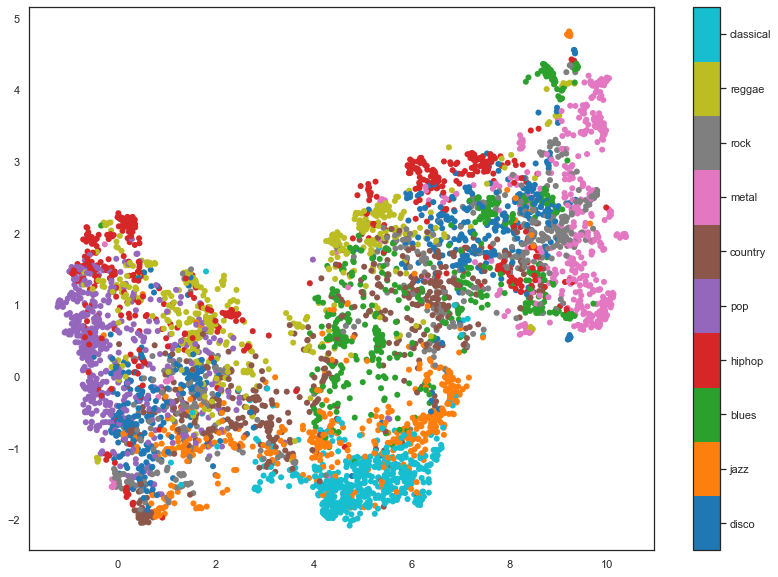

In [157]:
plt.scatter(x,
            y,
            c = labels_nums,
            cmap='tab10',
            linewidths=.01 
)

cb = plt.colorbar(boundaries=np.arange(11)-0.5)
cb.set_ticks(range(10))
cb.set_ticklabels(unique_labels)
